In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple grad_descent

In [91]:
def grad_des(start, iters, grad):
    points = [start]
    for ite in iters:
        points.append(points[-1]-ite*grad(points[-1]))
        
    return points

In [92]:
def func1(x):
    ########  quadratic polynomial
    return 0.5*x.dot(x)
def grad(x):
    return x


In [72]:
x0 = np.random.normal(0, 1, (1000))

In [94]:
x_t = grad_des((x0),[0.2]*20, grad)

### Constrained

In [95]:

def graph_plt(val):
    plt.figure(figsize=(5, 5))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.plot(range(len(val)), val, linewidth=3.0)

In [96]:
####    Affine subspace
U = np.linalg.qr(np.random.normal(0, 1, (1000, 100)))[0]
a = np.random.normal(0, 1, 1000)

def project(x):
    return a + U.dot(U.T).dot(x-a)

In [97]:
def proj_grad_des(start, iters, grad):
    points = [start]
    for ite in iters:
        points.append(project(points[-1]-ite*grad(points[-1])))
        
    return points

In [98]:
x0 = np.random.normal(0, 1, (1000))
x_t = proj_grad_des(x0, [0.2]*20, grad)

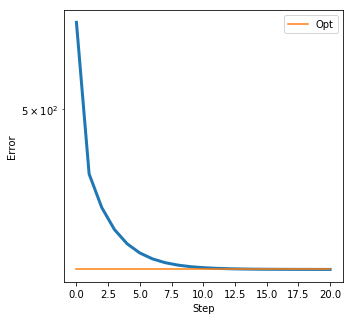

In [99]:
x_opt = project(0)
graph_plt([func1(x) for x in x_t])
plt.plot(range(len(x_t)), [func1(x_opt)]*len(x_t), label='Opt')
plt.legend()